In [1]:
import os
os.chdir("..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from multi_agent_reinforcement_learning.algos.sac import map_to_price

In [12]:
x = np.linspace(-10,10, 10000)

In [13]:
x_tanh = np.tanh(x)

In [14]:
y_hat = map_to_price(x_tanh, 0, 10)

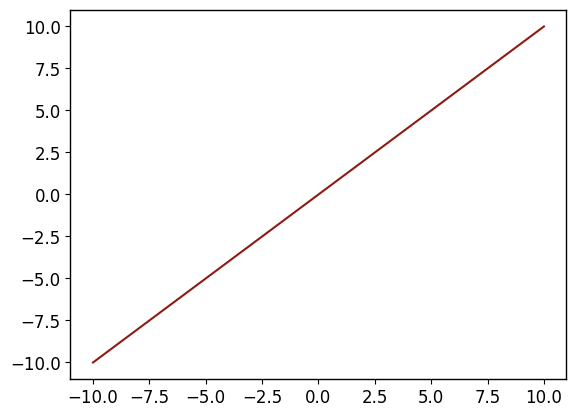

In [39]:
plt.plot(x, x)

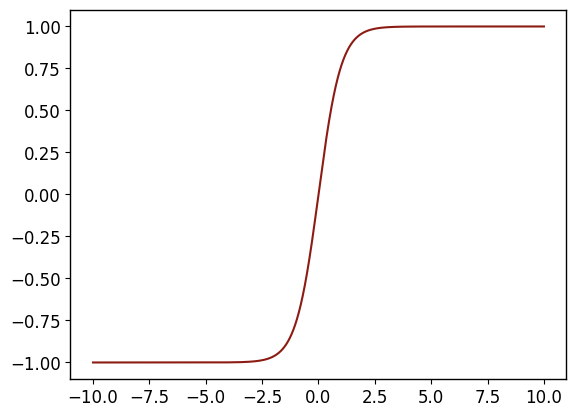

In [40]:
plt.plot(x, x_tanh)

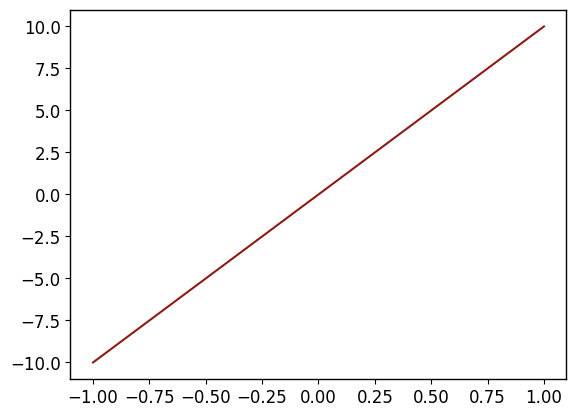

In [46]:
plt.plot(x_tanh, 10 * x_tanh)

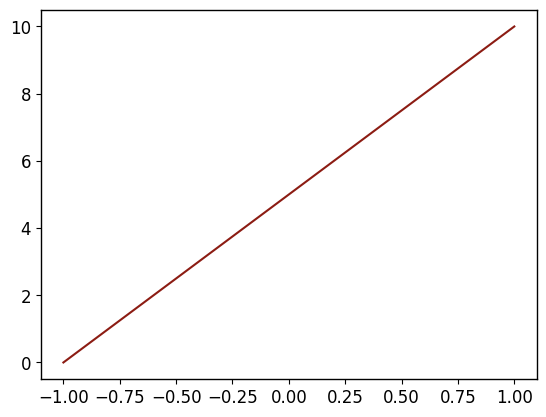

In [45]:
plt.plot(x_tanh, y_hat)
plt.show()

In [47]:
np.exp(10)

22026.465794806718

In [48]:
np.log(22026)

9.999978852724889

In [55]:
np.random.dirichlet([1,2,8])

array([0.01022267, 0.11907795, 0.87069938])

In [67]:
from scipy.stats import dirichlet

In [72]:
alpha = [0.2]

In [81]:
quantiles = np.array([0.2,0.8])  # specify quantiles
alpha = np.array([0.4, 5])  # specify concentration parameters
dirichlet.pdf(quantiles, alpha)

0.9012838127277264

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import dirichlet

# Define the alpha parameters for the Dirichlet distribution


# Create a mesh of points in a 2D simplex
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
X, Y = X.flatten(), Y.flatten()
Z = 1 - X - Y
mask = Z >= 0
X, Y, Z = X[mask], Y[mask], Z[mask]

# Calculate the PDF of the Dirichlet distribution at each point
pdf = dirichlet.pdf(np.stack((X, Y, Z), axis=-1), alphas)

# Plot these values on a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X, Y, Z, c=pdf, cmap='viridis')
plt.colorbar(sc, label='PDF')
ax.set_xlabel('X probability')
ax.set_ylabel('Y probability')
ax.set_zlabel('Z probability')
ax.set_title('Dirichlet Distribution PDF with alpha parameters [2, 3, 4]')
plt.show()

ValueError: Vector 'x' must have either the same number of entries as, or one entry fewer than, parameter vector 'a', but alpha.shape = (3,) and x.shape = (4966, 3).

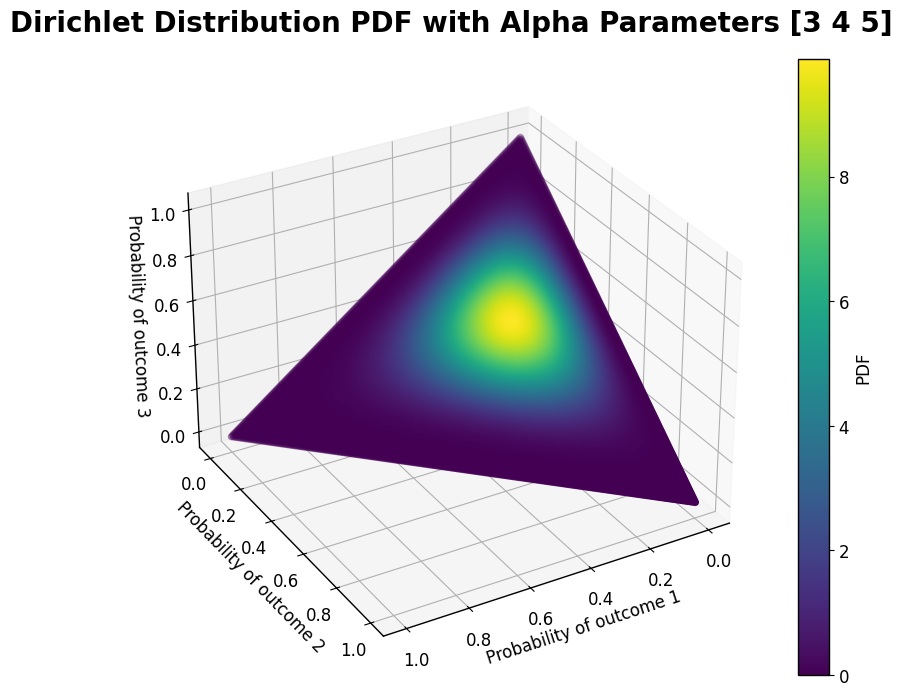

In [105]:
def create_simplex_3d(steps=30):
    """Create a 3D simplex grid."""
    # Create an empty list to store the coordinates
    coords = []

    # Generate coordinates where the sum is less than or equal to 1
    for i in range(steps + 1):
        for j in range(steps - i + 1):
            k = steps - i - j
            coords.append([i / steps, j / steps, k / steps])

    return np.array(coords)

alphas = np.array([3, 4, 5])
elev = 30  # elevation angle
azim = 60  # azimuthal angle

# Generate the simplex grid
simplex_grid = create_simplex_3d(steps=200)

# Calculate the PDF for each point in the simplex
pdf_values = dirichlet.pdf(simplex_grid.T, alphas)

# Plot the PDF in a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(simplex_grid[:, 0], simplex_grid[:, 1], simplex_grid[:, 2], c=pdf_values, cmap='viridis')

ax.view_init(elev=elev, azim=azim)

# Adding color bar and labels
plt.colorbar(scatter, label='PDF')
ax.set_xlabel('Probability of outcome 1')
ax.set_ylabel('Probability of outcome 2')
ax.set_zlabel('Probability of outcome 3')
ax.set_title(f'Dirichlet Distribution PDF with Alpha Parameters {alphas}')

plt.show()